In [1]:
from scipy.ndimage import correlate
from skimage import color, io, measure, img_as_ubyte, exposure
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk
from skimage.filters import threshold_otsu

In [2]:
# From https://scikit-image.org/docs/stable/auto_examples/applications/plot_morphology.html
def plot_comparison(original, filtered, filter_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    io.show()

## Exercise 1 - Morphology on a single object

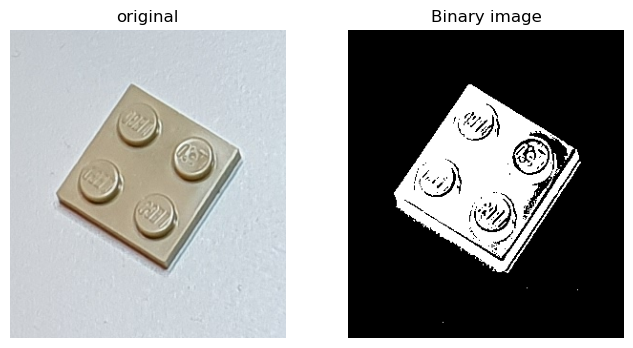

In [3]:
# Directory containing data and images
in_dir = "data/"
im_name = "lego_5.png"

#read img
im_org = io.imread(in_dir + im_name)
#convert img to grayscale
gray_img = color.rgb2gray(im_org)
#find threshold using otsu's
thres = threshold_otsu(gray_img)
bin_img = gray_img < thres
#bin_img = img_as_ubyte(mask)

plot_comparison(im_org, bin_img, 'Binary image')

#io.imshow(gray_img)
#plt.title('Gaussian')
#io.show()

## Exercise 2

[[0 0 1 0 0]
 [0 1 1 1 0]
 [1 1 1 1 1]
 [0 1 1 1 0]
 [0 0 1 0 0]]


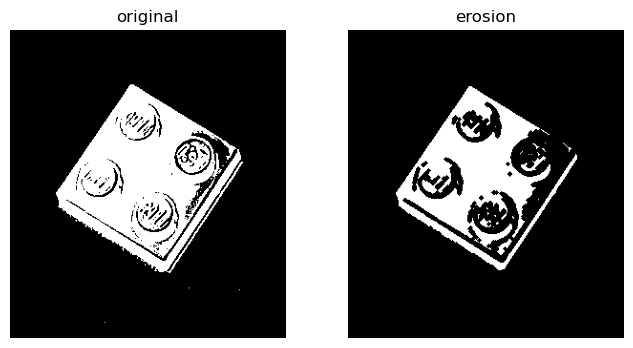

In [4]:
footprint = disk(2)
# Check the size and shape of the structuring element
print(footprint)

eroded = erosion(bin_img, footprint)
plot_comparison(bin_img, eroded, 'erosion')

## Exercise 3 - 5

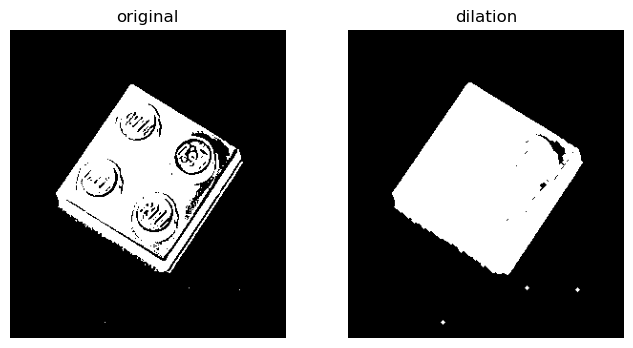

In [5]:
footprint = disk(2)
dilated = dilation(bin_img, footprint)
plot_comparison(bin_img, dilated, 'dilation')

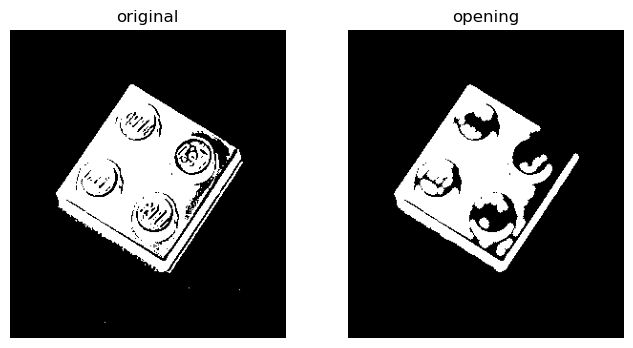

In [6]:
footprint = disk(3)
opened = opening(bin_img, footprint)
plot_comparison(bin_img, opened, 'opening')

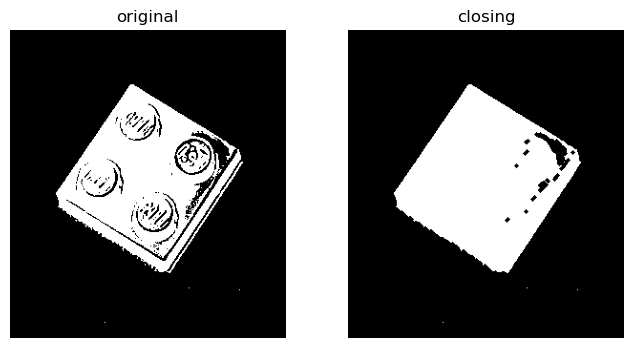

In [7]:
footprint = disk(2)
closed = closing(bin_img, footprint)
plot_comparison(bin_img, closed, 'closing')

## Exercise 6-7 - Object outline

In [8]:
def compute_outline(bin_img):
    """
    Computes the outline of a binary image
    """
    footprint = disk(1)
    dilated = dilation(bin_img, footprint)
    outline = np.logical_xor(dilated, bin_img)
    return outline

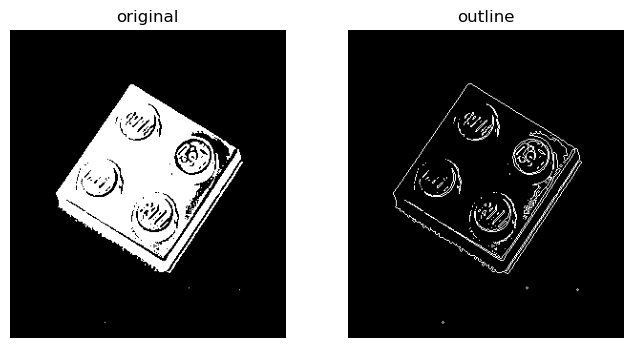

In [9]:
outline = compute_outline(bin_img)
plot_comparison(bin_img, outline, 'outline')

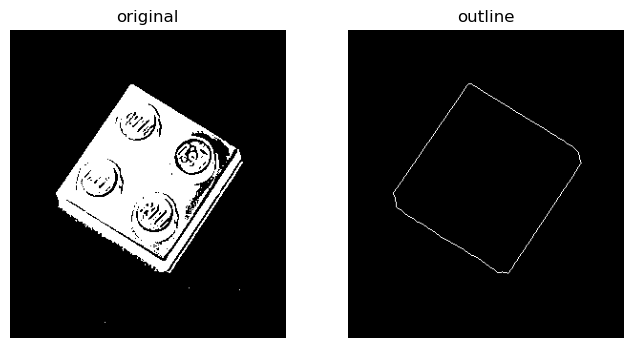

In [10]:
opened = opening(bin_img, disk(1))
closed = closing(opened, disk(15))
outline = compute_outline(closed)
plot_comparison(bin_img, outline, 'outline')

## Exercise 8-10 - Morphology on multiple objects

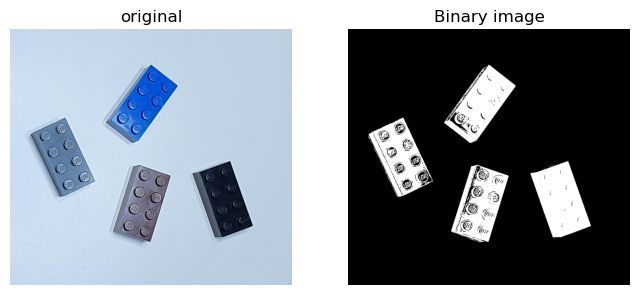

In [11]:
#read img
im_org = io.imread(in_dir + 'lego_7.png')
#convert img to grayscale
gray_img = color.rgb2gray(im_org)
#find threshold using otsu's
thres = threshold_otsu(gray_img)
bin_img = gray_img < thres
#bin_img = img_as_ubyte(mask)

plot_comparison(im_org, bin_img, 'Binary image')

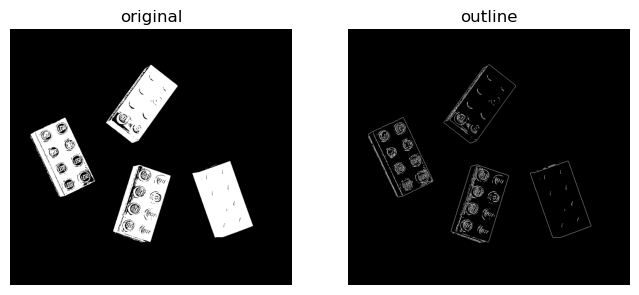

In [12]:
outline = compute_outline(bin_img)
plot_comparison(bin_img, outline, 'outline')

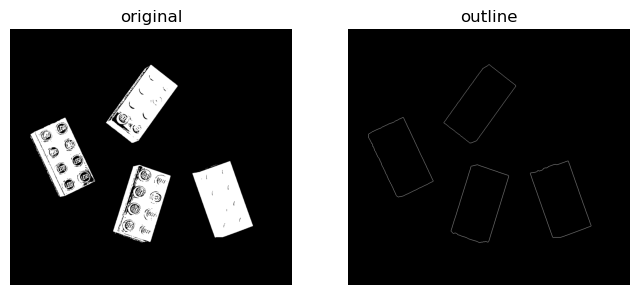

In [23]:
closed = closing(bin_img, disk(8))
outline = compute_outline(closed)
plot_comparison(bin_img, outline, 'outline')

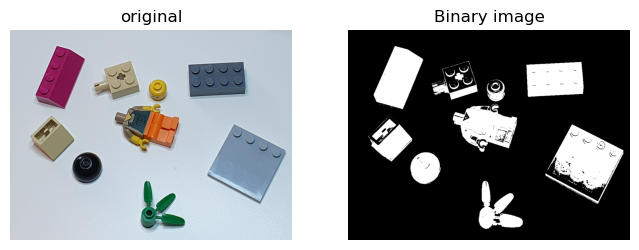

In [25]:
#read img
im_org = io.imread(in_dir + 'lego_3.png')
#convert img to grayscale
gray_img = color.rgb2gray(im_org)
#find threshold using otsu's
thres = threshold_otsu(gray_img)
bin_img = gray_img < thres
#bin_img = img_as_ubyte(mask)

plot_comparison(im_org, bin_img, 'Binary image')

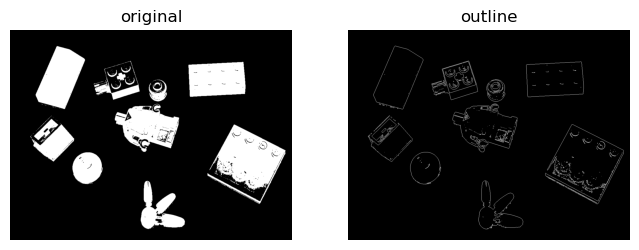

In [26]:
outline = compute_outline(bin_img)
plot_comparison(bin_img, outline, 'outline')

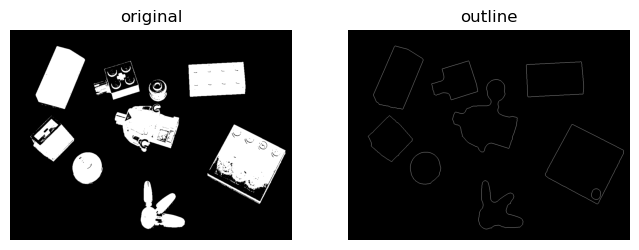

In [32]:
closed = closing(bin_img, disk(16))
outline = compute_outline(closed)
plot_comparison(bin_img, outline, 'outline')

## Morphology on multiple connected objects

## Exercise 11

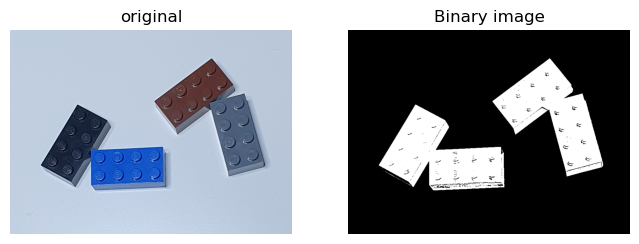

In [34]:
#read img
im_org = io.imread(in_dir + 'lego_9.png')
#convert img to grayscale
gray_img = color.rgb2gray(im_org)
#find threshold using otsu's
thres = threshold_otsu(gray_img)
bin_img = gray_img < thres
#bin_img = img_as_ubyte(mask)

plot_comparison(im_org, bin_img, 'Binary image')

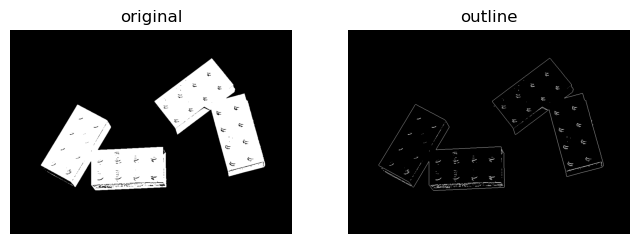

In [35]:
outline = compute_outline(bin_img)
plot_comparison(bin_img, outline, 'outline')

## Exercise 12

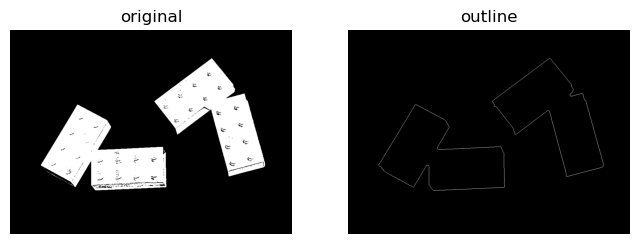

In [44]:
closed = closing(bin_img, disk(5))
outline = compute_outline(closed)
plot_comparison(bin_img, outline, 'outline')

## Exercise 13

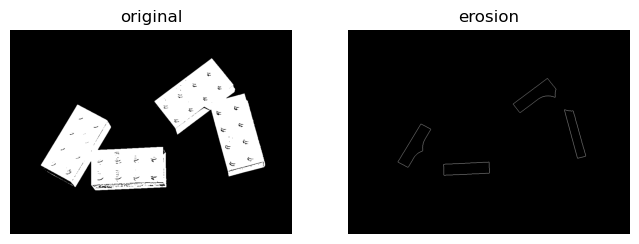

In [58]:
eroded = erosion(closed, disk(50))
outline = compute_outline(eroded)
plot_comparison(bin_img, outline, 'erosion')

## Exercise 14

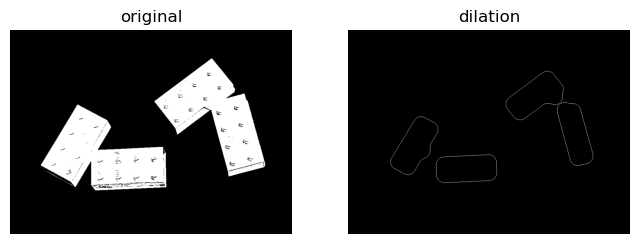

In [60]:
dilated = dilation(eroded, disk(25))
outline = compute_outline(dilated)
plot_comparison(bin_img, outline, 'dilation')

## Exercise 15

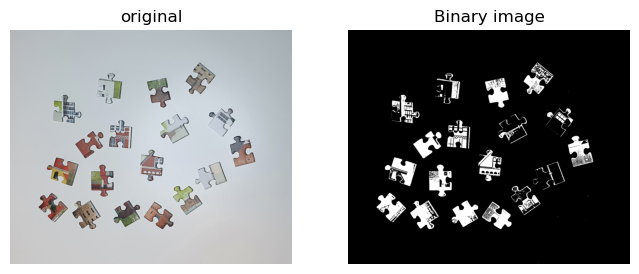

In [61]:
#read img
im_org = io.imread(in_dir + 'puzzle_pieces.png')
#convert img to grayscale
gray_img = color.rgb2gray(im_org)
#find threshold using otsu's
thres = threshold_otsu(gray_img)
bin_img = gray_img < thres
#bin_img = img_as_ubyte(mask)

plot_comparison(im_org, bin_img, 'Binary image')

## Exercise 16

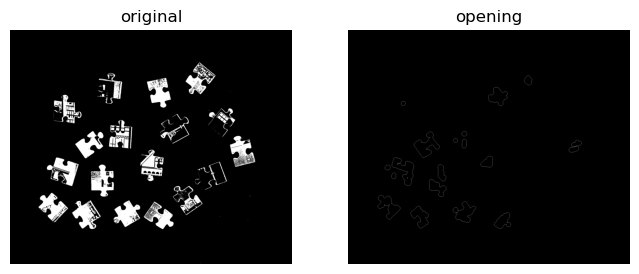

In [67]:
opened = opening(bin_img, disk(15))
outline = compute_outline(opened)
plot_comparison(bin_img, outline, 'opening')